1. Load Cleaned Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set(style="whitegrid")

# Load datasets
benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../data/sierra_leone_clean.csv', parse_dates=['Timestamp'])

# Add country labels
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# Combine
df = pd.concat([benin, togo, sierra], ignore_index=True)

In [2]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,2.2,0.4,0.1,122.1,0.0,998,False,0.0,26.3,26.2,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,2.2,0.0,0.0,0.0,0.0,998,False,0.0,26.3,26.2,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,False,0.0,26.4,26.2,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,False,0.0,26.4,26.3,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,False,0.0,26.4,26.3,Benin


 2. Boxplots for GHI, DNI, DHI

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_5428\2799081943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


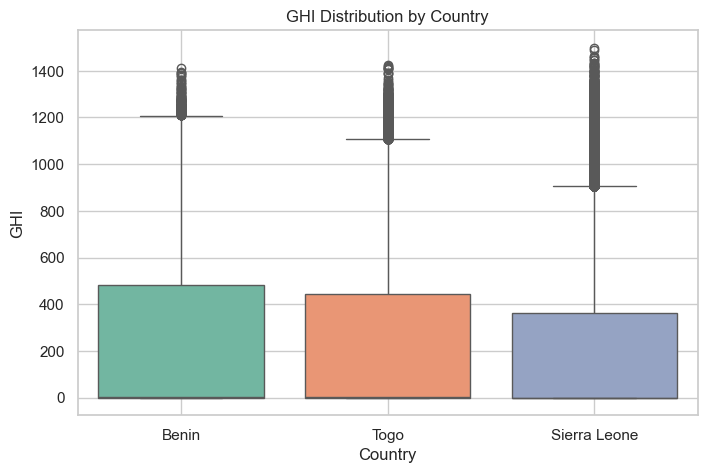

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_5428\2799081943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


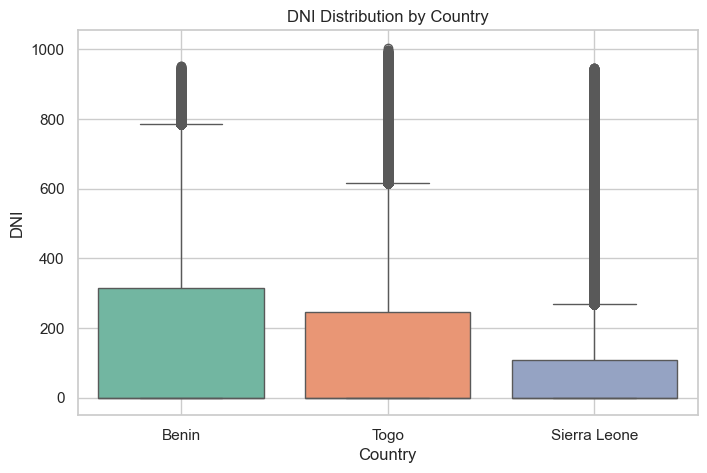

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_5428\2799081943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


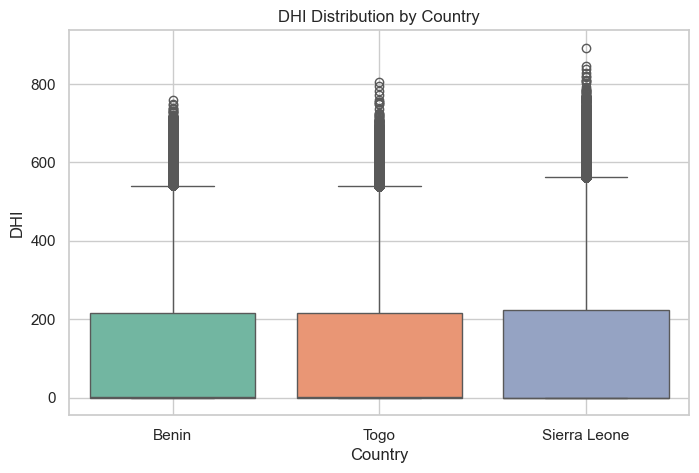

In [3]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.grid(True)
    plt.show()

3. Summary Table (Mean, Median, SD)

In [4]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.96    1.8  330.10  167.44    0.0  261.55  116.99    1.6   
Sierra Leone  204.41    0.3  296.79  116.52    0.0  218.57  116.27    0.0   
Togo          231.72    2.1  321.69  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         157.46  
Sierra Leone  157.02  
Togo          156.52

4. Statistical Test (One-Way ANOVA)

In [5]:
f_stat, p_val = f_oneway(
    df[df['Country'] == 'Benin']['GHI'],
    df[df['Country'] == 'Togo']['GHI'],
    df[df['Country'] == 'Sierra Leone']['GHI']
)

print(f"ANOVA Result for GHI across countries:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.5f}")

ANOVA Result for GHI across countries:
F-statistic: 1977.07, p-value: 0.00000


As the p-value is < 0.05, differences are statistically significant.

5. Key Observations

- Benin has the highest mean GHI (241.96 W/m²) and the widest variability, as indicated by its large standard deviation (330.10).
- Togo has the highest median GHI (2.1), suggesting it consistently receives moderate irradiance, though its average is slightly below Benin’s.
- Sierra Leone records the lowest GHI mean and median, indicating lower solar potential compared to the other two.
- ANOVA test result: p-value = 0.00000, indicating that GHI differences between countries are statistically significant at p < 0.05.

6. GHI Ranking Bar Chart

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_5428\4224448280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ghi_avg.values, y=ghi_avg.index, palette='Blues_r')


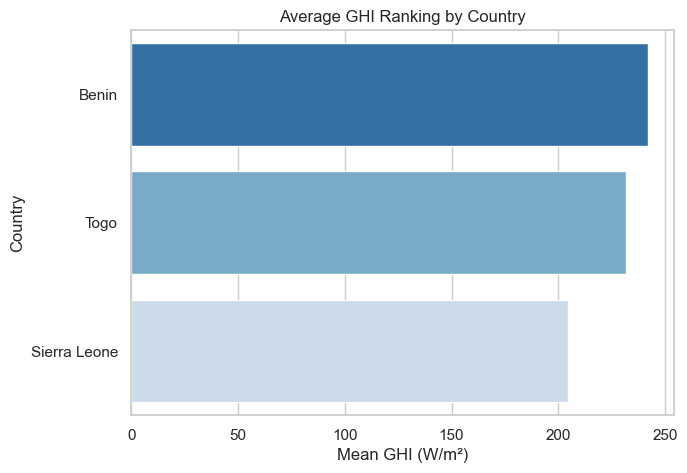

In [6]:
ghi_avg = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=ghi_avg.values, y=ghi_avg.index, palette='Blues_r')
plt.title('Average GHI Ranking by Country')
plt.xlabel('Mean GHI (W/m²)')
plt.show()